# II. 🔎 Exploratory Data Analysis

#### Importing essential librairies

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

color = sns.color_palette()
sns.set_style('darkgrid')

#### Importing the data 

In [72]:
df = pd.read_csv("../data/processed/glassdoor-data-engineer-cleaned.csv")
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,job_simp,seniority,job_languages,job_cloud,job_viz,job_databases,job_bigdata,job_devops,job_education,job_experience
0,PCS Global Tech,4.7,"Riverside, CA",Data Engineer | PAID BOOTCAMP,Responsibilities\r\n· Analyze and organize raw...,70000,501 to 1000 Employees,Company - Private,Information Technology,Information Technology Support Services,...,data engineer,na,"['sql', 'python', 'java']",[],[],[],[],[],NaN,0-2 years
1,Futuretech Consultants LLC,4.0,"Newton, MS",Snowflake Data Engineer,My name is Dileep and I am a recruiter at Futu...,76500,NaN,NaN,NaN,NaN,...,data engineer,na,['sql'],['snowflake'],['ssis'],['snowflake'],[],[],bachelor,2-5 years
2,Clairvoyant,4.4,Remote,Data Engineer (MDM),Required Skills:\r\nMust have 5-8+ Years of ex...,121500,51 to 200 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,...,data engineer,na,"['sql', 'python']","['databricks', 'aws']",[],[],['spark'],[],master,0-2 years
3,Apple,4.2,"Cupertino, CA",Data Engineer,"Summary\r\nPosted: Dec 22, 2021\r\nWeekly Hour...",111693,10000+ Employees,Company - Public,Information Technology,Computer Hardware Development,...,data engineer,na,['python'],[],['tableau'],[],[],[],NaN,NaN
4,Skytech Consultancy Services,5.0,"Baltimore, MD",Data Engineer,Description of Work:\r\nTechnical experience i...,117000,1 to 50 Employees,Company - Public,NaN,NaN,...,data engineer,na,['sql'],[],['tableau'],['oracle'],[],[],bachelor,5-10 years


In [73]:
cols = ['job_languages', 'job_cloud', 'job_viz', 'job_databases', 'job_bigdata', 'job_devops']

def safe_eval(x):
    try:
        return eval(x)
    except:
        return x

df[cols] = df[cols].astype(str).applymap(safe_eval)

### 📊 Visualizing the most in demande tools for Data Engineers

In [74]:
prog_languages = ['python', 'java', 'scala', 'go', 'r', 'c++', 'c#', 'sql', 'nosql', 'rust', 'shell']
cloud_tools = ['aws', 'azure', 'google cloud']
viz_tools = ['power bi', 'tableau', 'excel', 'ssis', 'qlik', 'sap', 'looker']
databases = ['sql server', 'postegresql', 'mongodb', 'mysql', 'oracle', 'casandra', 'elasticsearch', 'dynamodb', 'snowflake', 'redis', 'neo4j', 'hive', 'dbt', 'databricks', 'redshift', 'snowflake']
big_data = ['spark', 'hadoop', 'kafka', 'flink']
devops = ['gitlab', 'terraform', 'docker', 'kubernetes', 'ansible']

In [75]:
def filtered_keywords(tools, keywords, title, head=10):
    # get keywords in a column
    count_keywords = pd.DataFrame(tools.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')
    
    # get frequency of occurrence of word (as word only appears once per line)
    length = len(tools) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plot the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = sns.barplot(x="keywords", y="percentage", data=count_keywords, palette="deep")
    plt.xlabel("")
    plt.ylabel("Likelihood to be in job posting (%)")
    plt.xticks(rotation = 45, ha='right')
    plt.title(title) 
    plt.show(g)
    print(count_keywords)

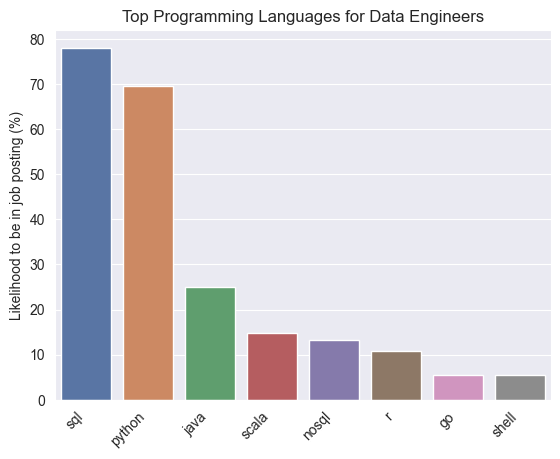

  keywords  counts  percentage
0      sql     259   78.012048
1   python     231   69.578313
2     java      83   25.000000
3    scala      49   14.759036
4    nosql      44   13.253012
5        r      36   10.843373
6       go      18    5.421687
7    shell      18    5.421687


In [76]:
filtered_keywords(df['job_languages'], prog_languages, title="Top Programming Languages for Data Engineers")

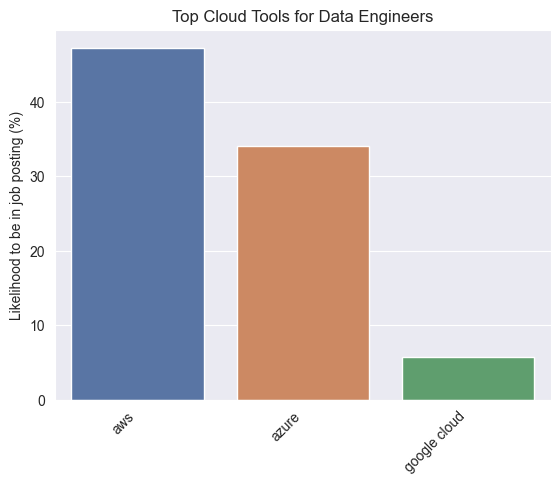

       keywords  counts  percentage
0           aws     157   47.289157
1         azure     113   34.036145
5  google cloud      19    5.722892


In [77]:
filtered_keywords(df['job_cloud'], cloud_tools, title="Top Cloud Tools for Data Engineers")

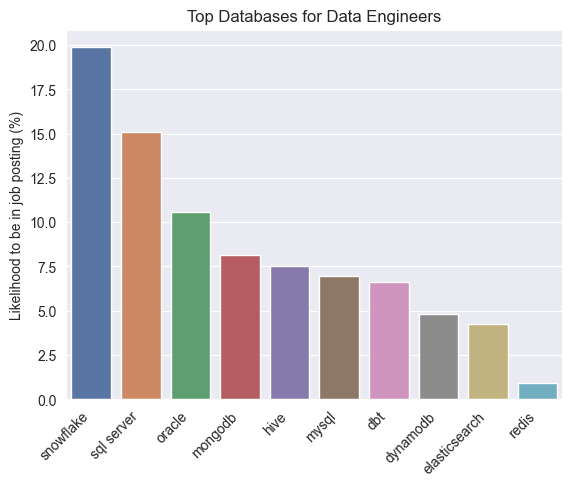

        keywords  counts  percentage
0      snowflake      66   19.879518
1     sql server      50   15.060241
2         oracle      35   10.542169
3        mongodb      27    8.132530
4           hive      25    7.530120
5          mysql      23    6.927711
6            dbt      22    6.626506
7       dynamodb      16    4.819277
8  elasticsearch      14    4.216867
9          redis       3    0.903614


In [78]:
filtered_keywords(df['job_databases'], databases, title="Top Databases for Data Engineers")

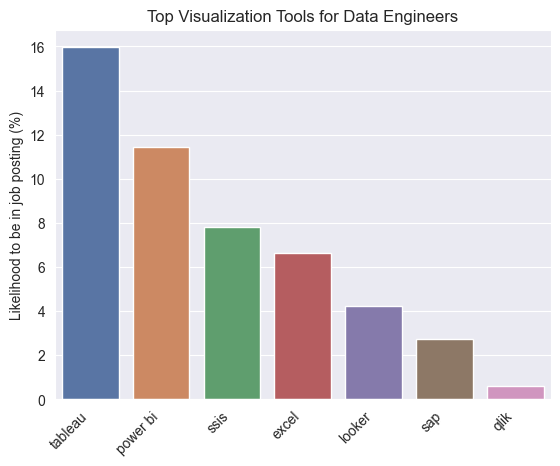

   keywords  counts  percentage
0   tableau      53   15.963855
1  power bi      38   11.445783
2      ssis      26    7.831325
3     excel      22    6.626506
4    looker      14    4.216867
5       sap       9    2.710843
6      qlik       2    0.602410


In [79]:
filtered_keywords(df['job_viz'], viz_tools, title="Top Visualization Tools for Data Engineers")

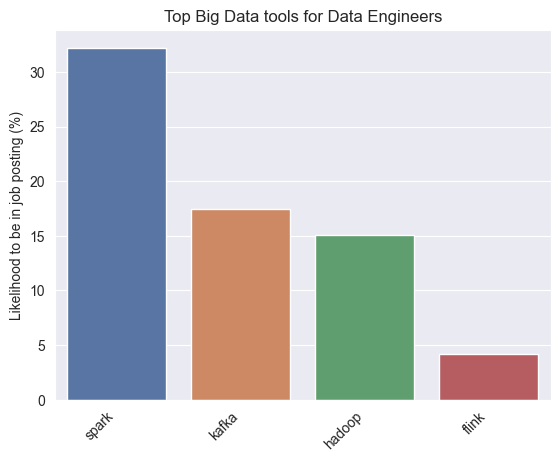

  keywords  counts  percentage
0    spark     107   32.228916
1    kafka      58   17.469880
2   hadoop      50   15.060241
3    flink      14    4.216867


In [80]:
filtered_keywords(df['job_bigdata'], big_data, title="Top Big Data tools for Data Engineers")

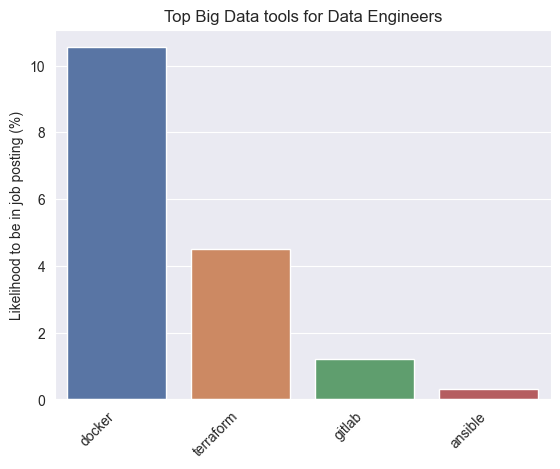

    keywords  counts  percentage
0     docker      35   10.542169
1  terraform      15    4.518072
3     gitlab       4    1.204819
4    ansible       1    0.301205


In [81]:
filtered_keywords(df['job_devops'], devops, title="Top Big Data tools for Data Engineers")

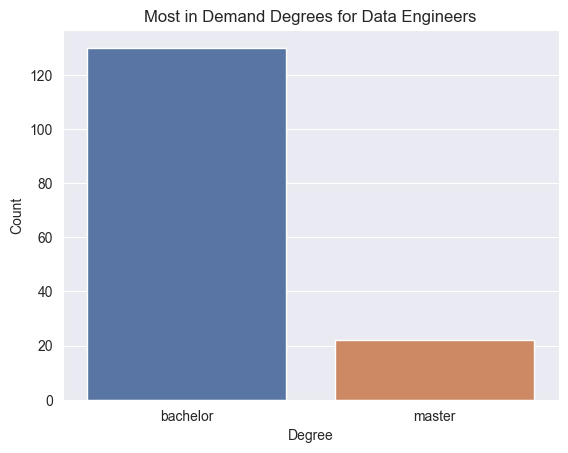

In [82]:
sns.countplot(data=df, x='job_education', palette="deep")

plt.title('Most in Demand Degrees for Data Engineers')
plt.xlabel('Degree')
plt.ylabel('Count')

plt.show()

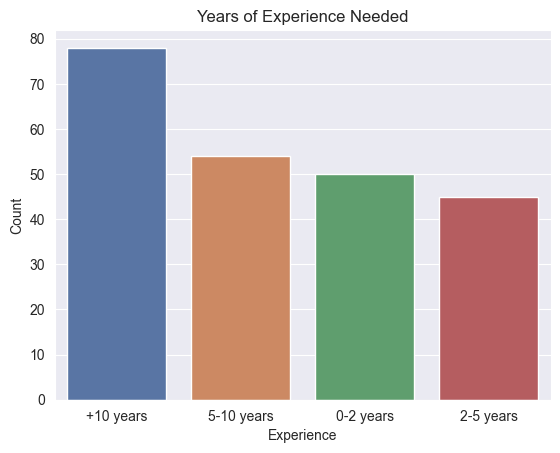

In [83]:
sns.countplot(data=df, x='job_experience', palette="deep", order = df['job_experience'].value_counts().index)

plt.title('Years of Experience Needed')
plt.xlabel('Experience')
plt.ylabel('Count')

plt.show()

Companies that are recruiting Data Engineers the most in Glassdoor

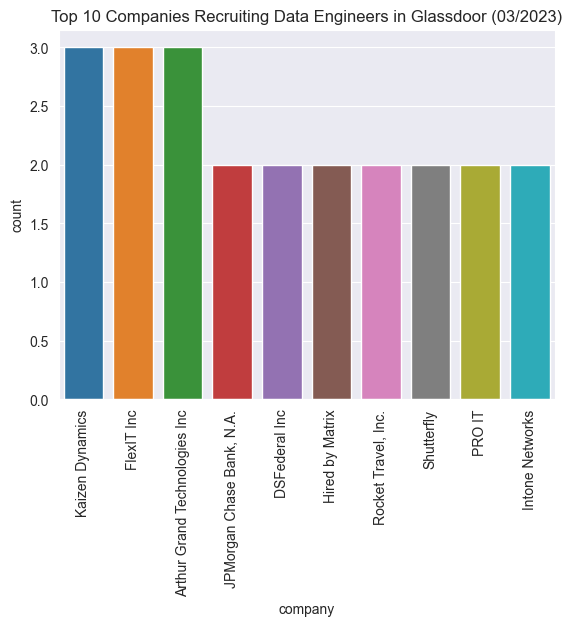

In [84]:
top10 = df['company'].value_counts().head(10)
sns.countplot(x='company', order=top10.index, data=df)
plt.title("Top 10 Companies Recruiting Data Engineers in Glassdoor (03/2023)")
plt.xticks(rotation=90)
plt.show()

Salary estimate distribution

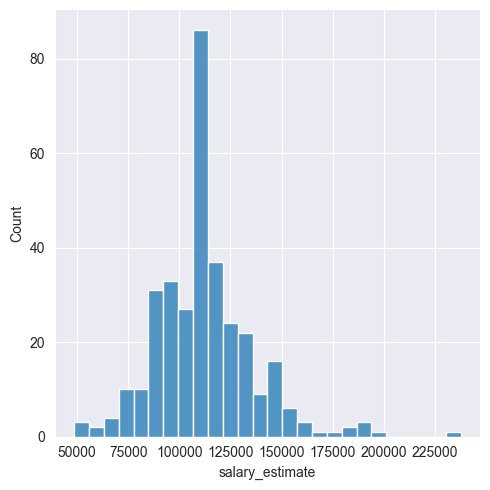

In [85]:
sns.displot(df['salary_estimate'])

<Axes: xlabel='company_rating', ylabel='Count'>

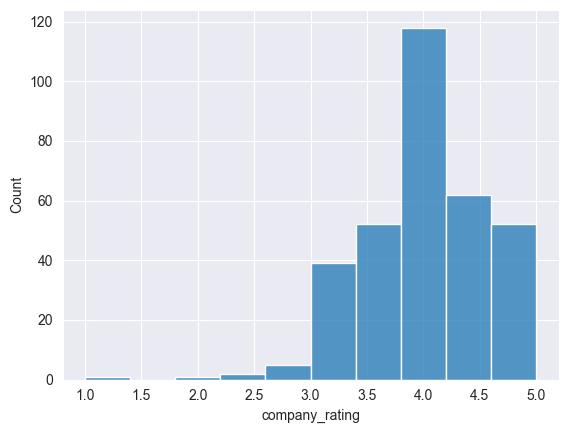

In [86]:
sns.histplot(df['company_rating'], bins=10)

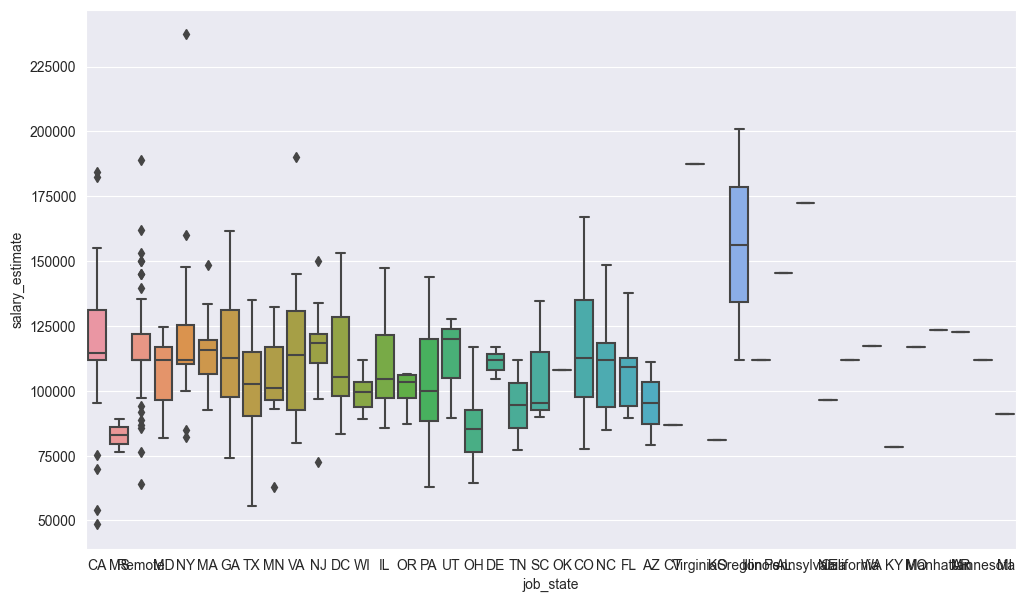

In [87]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.boxplot(data=df, x='job_state', y='salary_estimate')
plt.show()

Getting rid of the outliers

In [88]:
df = df[df['salary_estimate'] <= 175000]

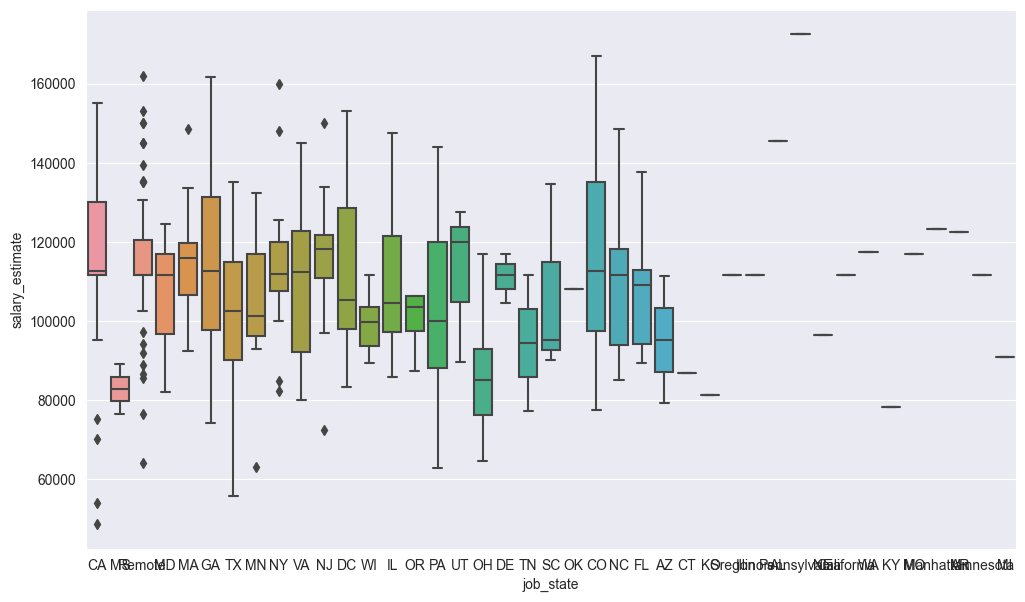

In [89]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.boxplot(data=df, x='job_state', y='salary_estimate')
plt.show()

In [90]:
df_cat = df[['job_state', 'seniority', 'company_revenue', 'company_age', 'company_industry', 'company_sector', 'company_type', 'company_size']]

graph for job_state: total = 41


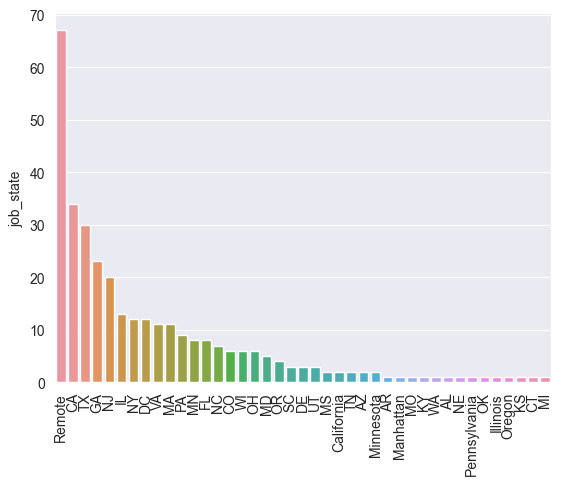

graph for seniority: total = 2


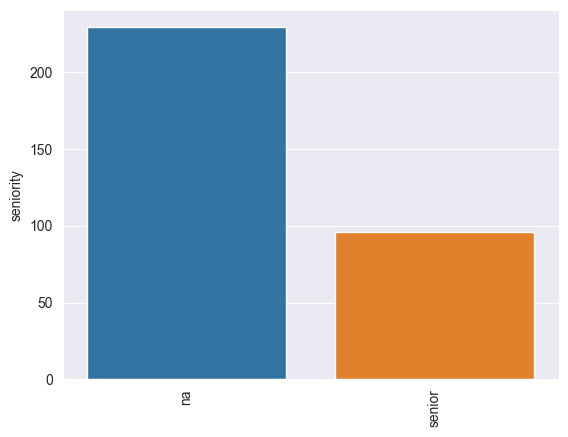

graph for company_revenue: total = 10


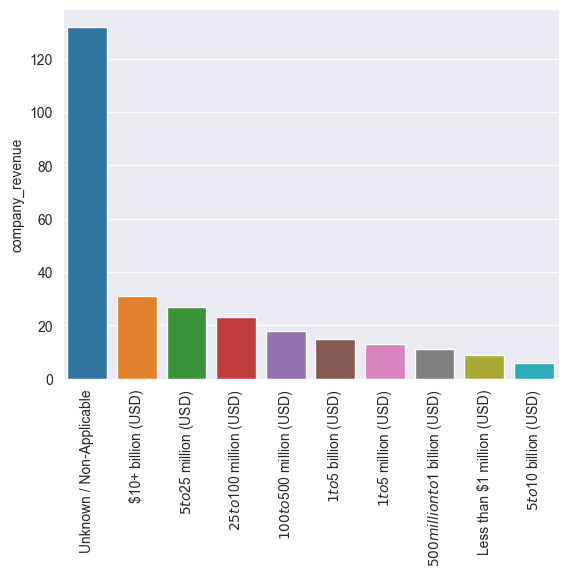

graph for company_age: total = 86


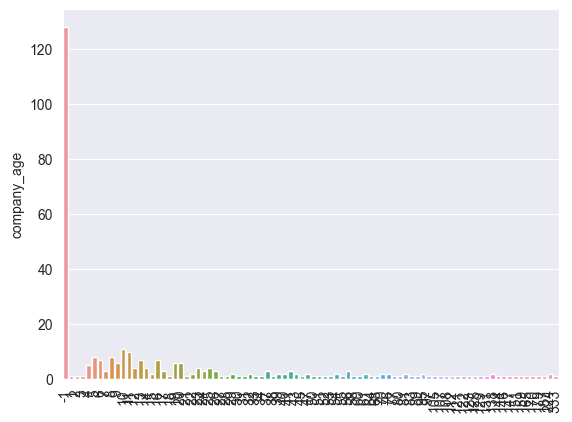

graph for company_industry: total = 50


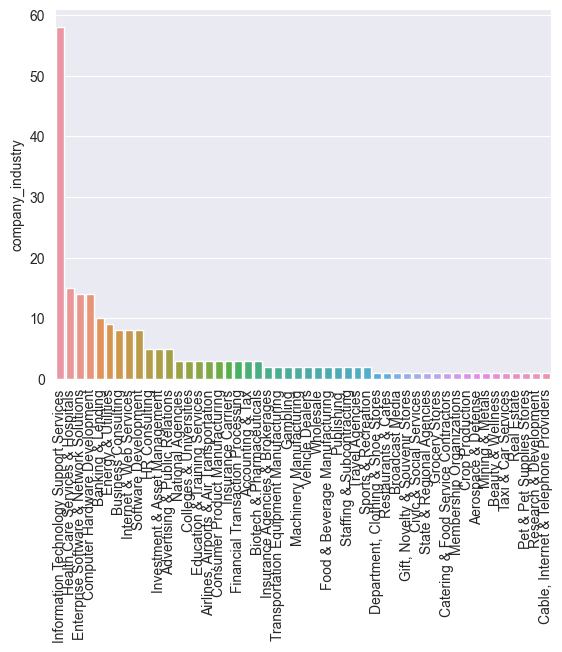

graph for company_sector: total = 23


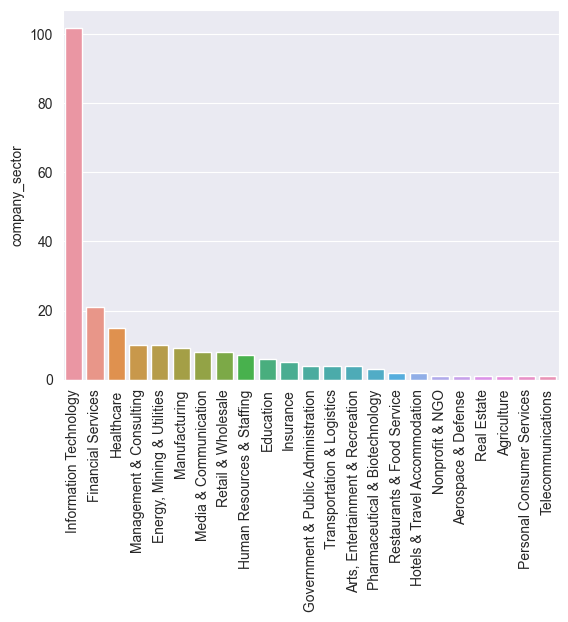

graph for company_type: total = 11


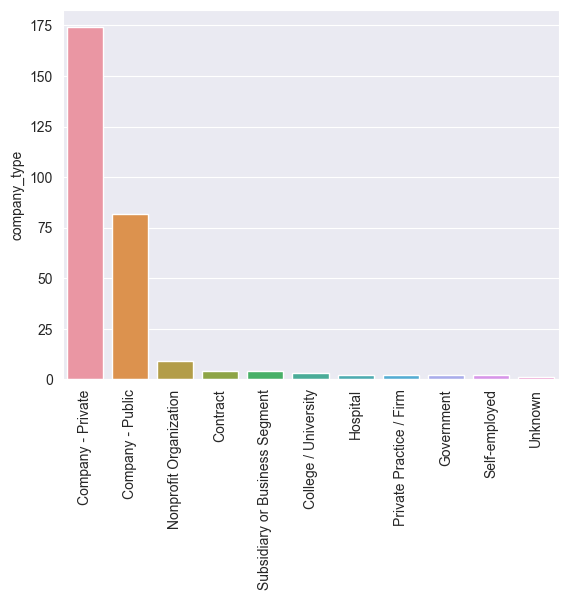

graph for company_size: total = 8


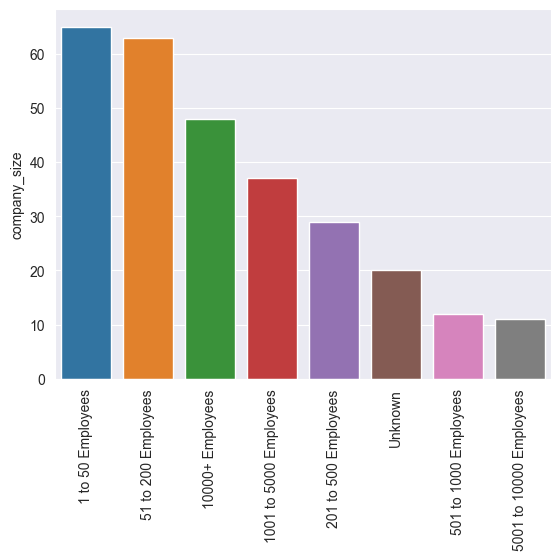

In [91]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Correlation Matrix

<Axes: >

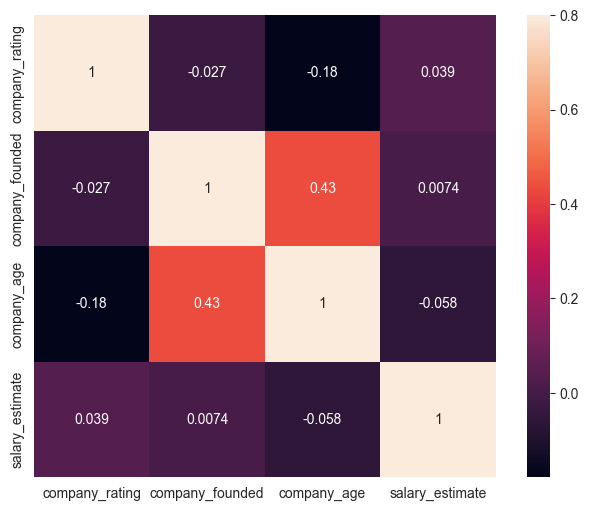

In [92]:
corrmat = df[['company_rating', 'company_founded', 'company_age', 'salary_estimate']].corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corrmat, vmax=0.8, annot=True, square=True)

Let's see how the salary estimate changes based on different features

In [93]:
pd.pivot_table(df, index = 'job_education', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
job_education,
master,117718.36
bachelor,109580.55


Data Engineers with Master's Degree get paid more

In [94]:
pd.pivot_table(df, index = 'seniority', values = 'salary_estimate').applymap('{:.2f}'.format)

,salary_estimate
seniority,
na,107033.88
senior,119367.65


Senior Data Engineers get paid more

In [95]:
pd.pivot_table(df, index = 'job_state', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
job_state,
Pennsylvania,172500.00
AL,145500.00
Manhattan,123264.00
AR,122500.00
CO,117425.00
WA,117395.00
MO,117000.00
NJ,116444.20
MA,115265.82


In [96]:
pd.pivot_table(df, index = 'job_state', values = 'salary_estimate', aggfunc = 'count').sort_values('salary_estimate', ascending = False)

,salary_estimate
job_state,
Remote,67
CA,34
TX,30
GA,23
NJ,20
IL,13
NY,12
DC,12
VA,11


CO state have the highest salary estimate but we only have 1 estimate, so we can't take that salary reliably that's why in the model building phase we are gonna drop states with less than 15 record.

In [97]:
pd.pivot_table(df, index = 'company_industry', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_industry,
"Department, Clothing & Shoe Stores",161600.00
Travel Agencies,147500.00
HR Consulting,136920.00
Insurance Carriers,136238.33
Real Estate,133850.00
Broadcast Media,130000.00
Insurance Agencies & Brokerages,126250.00
Transportation Equipment Manufacturing,124826.00
Internet & Web Services,121740.62


In [98]:
pd.pivot_table(df, index = 'company_industry', values = 'salary_estimate', aggfunc = 'count').sort_values('salary_estimate', ascending = False)

,salary_estimate
company_industry,
Information Technology Support Services,58
Health Care Services & Hospitals,15
Computer Hardware Development,14
Enterprise Software & Network Solutions,14
Banking & Lending,10
Energy & Utilities,9
Software Development,8
Internet & Web Services,8
Business Consulting,8


In [99]:
pd.pivot_table(df, index = 'company_size', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_size,
Unknown,119299.45
1 to 50 Employees,112825.46
201 to 500 Employees,111852.31
10000+ Employees,111841.27
51 to 200 Employees,111286.90
5001 to 10000 Employees,107344.64
501 to 1000 Employees,106674.08
1001 to 5000 Employees,103331.92


In [100]:
pd.pivot_table(df, index = 'company_revenue', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_revenue,
$5 to $10 billion (USD),118147.83
Less than $1 million (USD),117890.33
$1 to $5 billion (USD),115677.93
$100 to $500 million (USD),112629.67
Unknown / Non-Applicable,111270.77
$10+ billion (USD),111027.61
$25 to $100 million (USD),110727.39
$1 to $5 million (USD),109174.85
$5 to $25 million (USD),107042.81


In [101]:
pd.pivot_table(df, index = 'company_type', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_type,
Self-employed,138750.00
Unknown,123264.00
Private Practice / Firm,119255.50
Company - Public,113247.30
Company - Private,111255.01
College / University,105115.33
Government,99271.00
Subsidiary or Business Segment,98830.75
Contract,97000.00


Let's build a wordcloud to show relative importance of the words in the job description

In [102]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [103]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

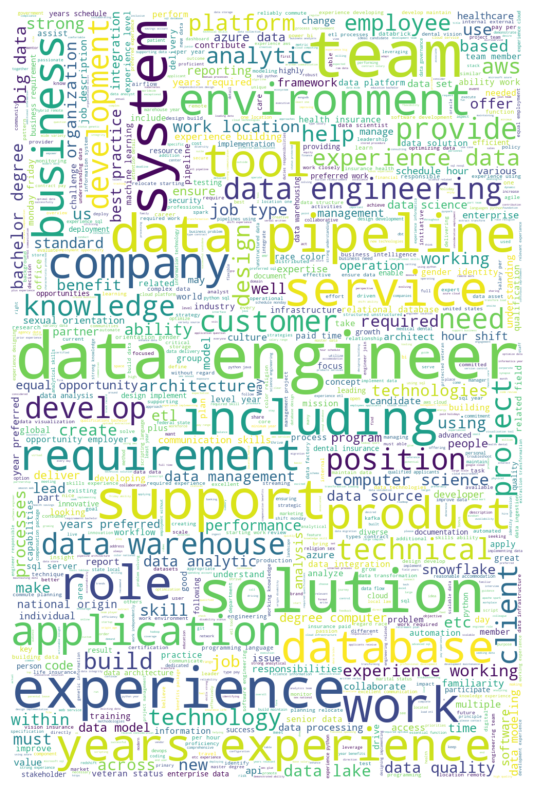

In [104]:
words = " ".join(df['job_description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words = 1000, width=1000, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [105]:
data_path = '../data/processed/'

df.to_csv(data_path + "glassdoor-data-engineer-eda.csv", index=False)